In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/suicide-rates-overview-1985-to-2016/master.csv


In [2]:
import pandas as pd

dataset_primary = pd.read_csv('/kaggle/input/suicide-rates-overview-1985-to-2016/master.csv')
dataset = dataset_primary

In [3]:
dataset = dataset[(dataset.year != 2016)]

In [4]:
dataset = dataset.sort_values('year')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27660 entries, 17073 to 16180
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27660 non-null  object 
 1   year                27660 non-null  int64  
 2   sex                 27660 non-null  object 
 3   age                 27660 non-null  object 
 4   suicides_no         27660 non-null  int64  
 5   population          27660 non-null  int64  
 6   suicides/100k pop   27660 non-null  float64
 7   country-year        27660 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27660 non-null  object 
 10  gdp_per_capita ($)  27660 non-null  int64  
 11  generation          27660 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.7+ MB


Column HDI for year(8) for year has a lot of null values.

In [5]:
dataset.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
17073,Netherlands,1985,male,15-24 years,136,1278200,10.64,Netherlands1985,0.799,"142,009,922,306",10428,Generation X
4545,Bulgaria,1985,female,75+ years,94,222700,42.21,Bulgaria1985,0.686,"17,155,421,053",2044,G.I. Generation
4544,Bulgaria,1985,male,75+ years,218,166200,131.17,Bulgaria1985,0.686,"17,155,421,053",2044,G.I. Generation
24978,Thailand,1985,male,25-34 years,453,4104134,11.04,Thailand1985,0.539,"38,900,692,712",840,Boomers
24979,Thailand,1985,male,55-74 years,211,1912525,11.03,Thailand1985,0.539,"38,900,692,712",840,G.I. Generation


In [6]:
dataset.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [7]:
arr = dataset['country'].values == 'Albania'
dataset[arr]

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
11,Albania,1987,male,5-14 years,0,338200,0.00,Albania1987,NaN,"2,156,624,900",796,Generation X
10,Albania,1987,female,55-74 years,0,144600,0.00,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
9,Albania,1987,female,5-14 years,0,311000,0.00,Albania1987,NaN,"2,156,624,900",796,Generation X
7,Albania,1987,female,25-34 years,4,257200,1.56,Albania1987,NaN,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
257,Albania,2010,female,25-34 years,6,183579,3.27,Albania2010,0.722,"11,926,953,259",4359,Generation X
256,Albania,2010,male,15-24 years,10,279508,3.58,Albania2010,0.722,"11,926,953,259",4359,Millenials
255,Albania,2010,male,75+ years,2,50767,3.94,Albania2010,0.722,"11,926,953,259",4359,Silent
254,Albania,2010,male,25-34 years,9,179720,5.01,Albania2010,0.722,"11,926,953,259",4359,Generation X


In [8]:
dataset.groupby('year')['suicides/100k pop'].transform('sum').unique()

array([ 6811.89,  6579.84,  7545.45,  7473.13,  8036.54,  9878.75,
       10321.06, 10528.88, 10790.29, 11483.79, 14660.26, 14142.21,
       13817.83, 14150.72, 14473.91, 14387.45, 14276.21, 14227.72,
       13627.58, 12581.8 , 12164.99, 12166.01, 12410.15, 12145.84,
       12176.04, 11843.99, 11367.84, 11101.91, 10663.64, 10306.73,
        8253.99])

In [9]:
dataset.groupby('year')['suicides_no'].transform('sum').unique()

array([116063, 120670, 126842, 121026, 160244, 193361, 198020, 211473,
       221565, 232063, 243544, 246725, 240745, 249591, 256119, 255832,
       250652, 256095, 256079, 240861, 234375, 233361, 233408, 235447,
       243487, 238702, 236484, 230160, 223199, 222984, 203640])

In [10]:
suicides_per_year = dataset.groupby('year')['suicides_no'].transform('sum').unique()
population = dataset.groupby('year')['population'].transform('sum').unique()

In [11]:
suicides_per_hundredK = []
for i in range(len(suicides_per_year)):
    suicides_per_hundredK.append((suicides_per_year[i]/population[i]) * 100000)

In [12]:
year_list = dataset.year.unique()
year_list

array([1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995,
       1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006,
       2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015])

<function matplotlib.pyplot.show(*args, **kw)>

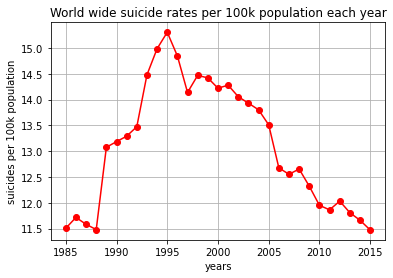

In [13]:
import matplotlib.pyplot as plt

plt.plot(year_list, suicides_per_hundredK, marker='o', color='red')
plt.xlabel('years')
plt.ylabel('suicides per 100k population')
plt.title('World wide suicide rates per 100k population each year')
plt.grid(True, which = 'both')
plt.show

In [14]:
male_suicide_rate = (dataset[dataset['sex'] == 'male'].groupby('year')['suicides_no'].transform('sum').unique() / dataset[dataset['sex'] == 'male'].groupby('year')['population'].transform('sum').unique()) * 100000
female_suicide_rate = (dataset[dataset['sex'] == 'female'].groupby('year')['suicides_no'].transform('sum').unique() / dataset[dataset['sex'] == 'female'].groupby('year')['population'].transform('sum').unique()) * 100000

<function matplotlib.pyplot.show(*args, **kw)>

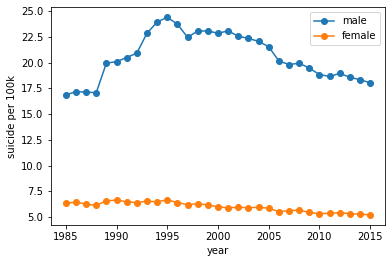

In [15]:
fig, ax = plt.subplots()

ax.plot(year_list, male_suicide_rate, marker='o')
ax.plot(year_list, female_suicide_rate, marker='o')
plt.ylabel('suicide per 100k')
plt.xlabel('year')
plt.legend(['male', 'female'])
plt.show

In [16]:
male_suicide_rate

array([16.86565523, 17.17658998, 17.13850823, 17.07907971, 19.95055636,
       20.0970145 , 20.49185815, 20.92990456, 22.84948436, 23.94550156,
       24.41080782, 23.735183  , 22.46994745, 23.06203554, 23.08544326,
       22.85322622, 23.09053972, 22.56300196, 22.35987513, 22.06590137,
       21.54610361, 20.16591956, 19.81672627, 19.94626129, 19.47505539,
       18.84558539, 18.65886476, 18.95821094, 18.5799136 , 18.34478135,
       18.04078422])

We can see that 1995 had huge suicide rate. This is very unnatural. Let's dig into it.